In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [3]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [4]:
 confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301


In [5]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# death_df.head()

In [7]:
# country_df.head()

In [8]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [9]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [21]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
            "</span>"+
             "</div>")
       )

# COVID-19 Confirmed/Death/Recovered cases by countries

In [22]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [23]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

In [24]:
# # plotting the 10 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

In [25]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
        print(i)
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

# Check the details of your country or the World
Enter the name of your country(in capitalized format(e.g. Italy)) and world for total cases

In [30]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'autosize': True, 'template': '...'}
}),), layout=Lay…

# 10 worst hit countries - Confirmed cases

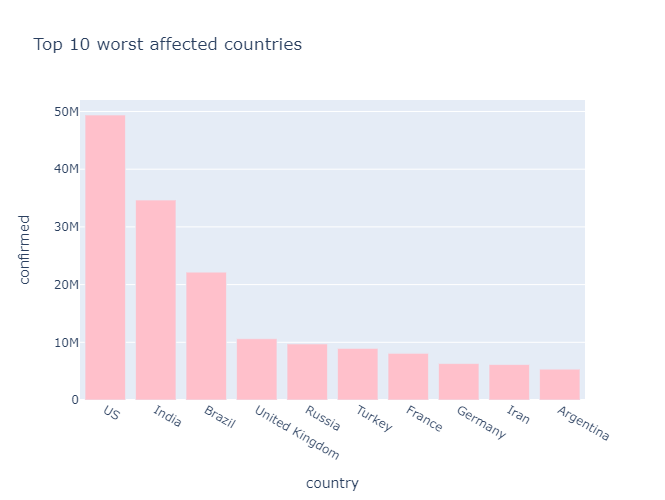

In [27]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)


# 10 worst hit countries - Death cases

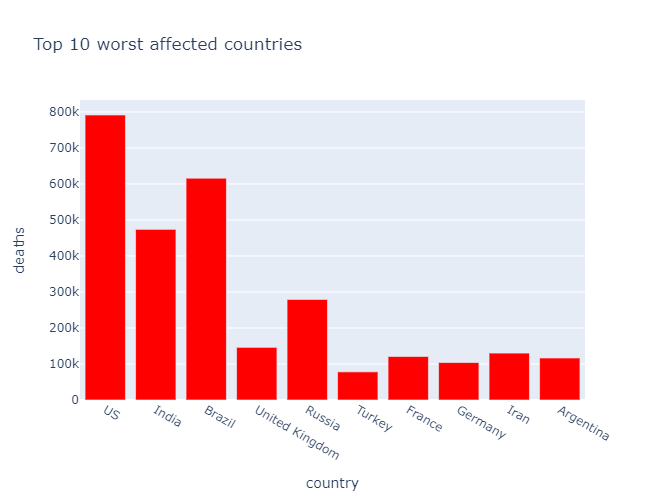

In [29]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=800
)

# Vaccination Progress

In [35]:
import numpy as np
import pandas as pd
file = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
to_drp = ['iso_code', 'continent','total_cases', 'new_cases',
'new_cases_smoothed', 'total_deaths', 'new_deaths',
'new_deaths_smoothed', 'total_cases_per_million',
'new_cases_per_million',
'total_deaths_per_million', 'new_deaths_per_million',
'reproduction_rate', 'icu_patients',
'icu_patients_per_million', 'hosp_patients',
'hosp_patients_per_million', 'weekly_icu_admissions',
'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
'total_tests_per_thousand', 'new_tests_per_thousand',
'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
'new_vaccinations', 'new_vaccinations_smoothed',
'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
'total_boosters_per_hundred',
'new_vaccinations_smoothed_per_million', 'stringency_index',
'population', 'population_density', 'median_age', 'aged_65_older',
'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
'life_expectancy', 'human_development_index',
'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
'excess_mortality', 'excess_mortality_cumulative_per_million']

file['new_deaths_smoothed_per_million'] = file['new_deaths_smoothed_per_million']/10000
file['new_cases_smoothed_per_million'] = file['new_cases_smoothed_per_million']/10000
file.to_csv("Vaccine.csv",index=False)

Enter location:  Estonia


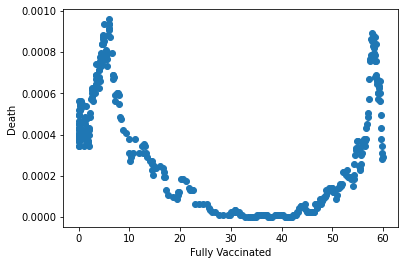

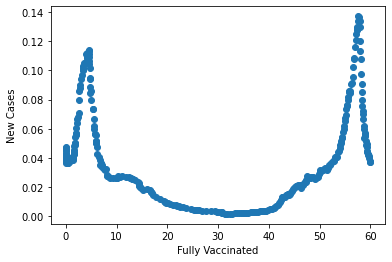

In [36]:
file = file[file["location"]==input("Enter location: ").capitalize()]
file.drop(to_drp,inplace= True ,axis=1)

file = file.dropna()

import matplotlib.pyplot as pt
pt.xlabel("Fully Vaccinated")
pt.ylabel("Death")
pt.scatter(file["people_fully_vaccinated_per_hundred"],file['new_deaths_smoothed_per_million'])
pt.savefig("vaccination_vs_death")
pt.show()

pt.xlabel("Fully Vaccinated")
pt.ylabel("New Cases")
pt.scatter(file["people_fully_vaccinated_per_hundred"],file['new_cases_smoothed_per_million'])
pt.savefig("vaccination_vs_newcase")
pt.show()
#print(file.head(10))